In [1]:
!pip install scipy

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

##############
file_name='d.DBN_results/S1_DBN_results.csv'
df = pd.read_csv(file_name, encoding="UTF-8").copy()
df['Node'] = df['Node'].map(lambda x : 'Node '+str(x))
df.rename(columns={'1':'probability (100s elapsed)', '2':'probability (200s elapsed)', '3':'probability (300s elapsed)', '4': 'probability (400s elapsed)'}, inplace=True)
first_slice=df[['Node', 'probability (100s elapsed)']]
second_slice=df[['Node', 'probability (200s elapsed)']]
third_slice=df[['Node', 'probability (300s elapsed)']]
fourth_slice = df[['Node', 'probability (400s elapsed)']]


In [3]:
##############
file_name = "d.smokedetector_t/2870_smokep_avg.csv"
sd=pd.read_csv(file_name, encoding='UTF-8')
sd_df=sd.copy()
sd_df=sd_df.fillna(0)
sd_df

,Unnamed: 0,100s,200s,300s,400s
0,Node 1,0.000015,0.000919,0.006005,0.017248
1,Node 2,0.000006,0.001124,0.006549,0.018651
2,Node 3,0.000093,0.001710,0.006439,0.014630
3,Node 4,0.000062,0.001320,0.006346,0.015793
4,Node 5,0.000008,0.000531,0.004324,0.014387
...,...,...,...,...,...
60,Node 61,0.000028,0.001568,0.006051,0.013661
61,Node 62,0.000071,0.001529,0.005619,0.013032
62,Node 63,0.000174,0.002620,0.007384,0.016534
63,Node 64,0.000008,0.001117,0.005245,0.012423


In [4]:
sd_df = sd_df.rename(columns = {'Unnamed: 0' : 'Node'})
sd_df

,Node,100s,200s,300s,400s
0,Node 1,0.000015,0.000919,0.006005,0.017248
1,Node 2,0.000006,0.001124,0.006549,0.018651
2,Node 3,0.000093,0.001710,0.006439,0.014630
3,Node 4,0.000062,0.001320,0.006346,0.015793
4,Node 5,0.000008,0.000531,0.004324,0.014387
...,...,...,...,...,...
60,Node 61,0.000028,0.001568,0.006051,0.013661
61,Node 62,0.000071,0.001529,0.005619,0.013032
62,Node 63,0.000174,0.002620,0.007384,0.016534
63,Node 64,0.000008,0.001117,0.005245,0.012423


#### Pearson 상관계수

In [5]:
df

,Node,probability (100s elapsed),probability (200s elapsed),probability (300s elapsed),probability (400s elapsed)
0,Node 1,0.0038,0.0480,0.2003,0.4174
1,Node 2,0.0259,0.1505,0.3880,0.6171
2,Node 3,0.1477,0.4245,0.6657,0.8206
3,Node 4,0.0140,0.1480,0.3957,0.6289
4,Node 5,0.0045,0.0551,0.2247,0.4565
...,...,...,...,...,...
60,Node 61,0.0027,0.0321,0.1456,0.3380
61,Node 62,0.0032,0.0598,0.2445,0.4889
62,Node 63,0.0013,0.0252,0.1521,0.3772
63,Node 64,0.0010,0.0158,0.0995,0.2687


<Axes: >

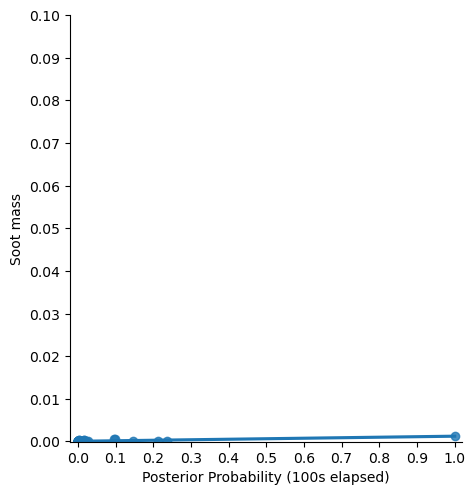

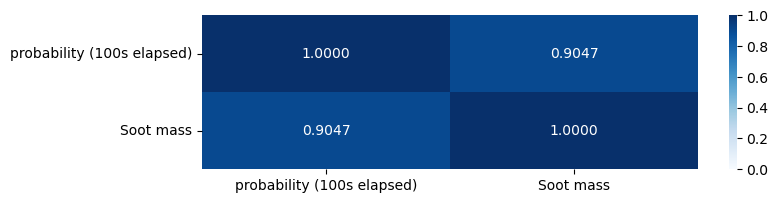

In [6]:
# 100s elapsed
sd_df_1st = sd_df[['Node', '100s']]
sd_df_1st = sd_df_1st.rename(columns = {'100s':'Soot mass'})

df_1st=pd.merge(first_slice, sd_df_1st)
#set_1 = set(df_1st[(df_1st['probability (100s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_1st[(df_1st['Soot mass'] == 0)].index.tolist())
#df_1st_index = list((set_1 | set_2))
#df_1st.drop(df_1st_index, inplace=True)

g1= sns.lmplot(data=df_1st, x='probability (100s elapsed)', y='Soot mass', ci=None)
g1=(g1.set_axis_labels("Posterior Probability (100s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], yticks=[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])
plt.figure(figsize=(8,2))
df_1st_corr=df_1st[['probability (100s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_1st_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

<Axes: >

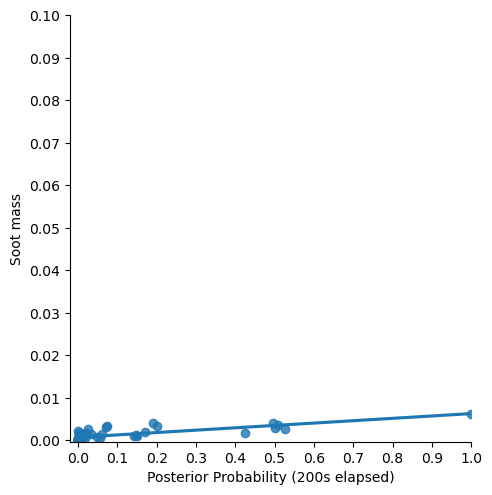

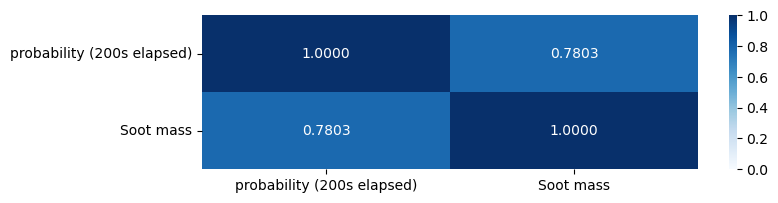

In [7]:
# 200s elapsed
sd_df_2nd = sd_df[['Node', '200s']]
sd_df_2nd = sd_df_2nd.rename(columns = {'200s':'Soot mass'})

df_2nd=pd.merge(second_slice, sd_df_2nd)
#set_1 = set(df_2nd[(df_2nd['probability (200s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_2nd[(df_2nd['Soot mass'] == 0)].index.tolist())
#df_2nd_index = list((set_1 | set_2))
#df_2nd.drop(df_2nd_index, inplace=True)

g2= sns.lmplot(data=df_2nd, x='probability (200s elapsed)', y='Soot mass', ci=None)
g2=(g2.set_axis_labels("Posterior Probability (200s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.0), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], yticks=[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10])
plt.figure(figsize=(8,2))
df_2nd_corr=df_2nd[['probability (200s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_2nd_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

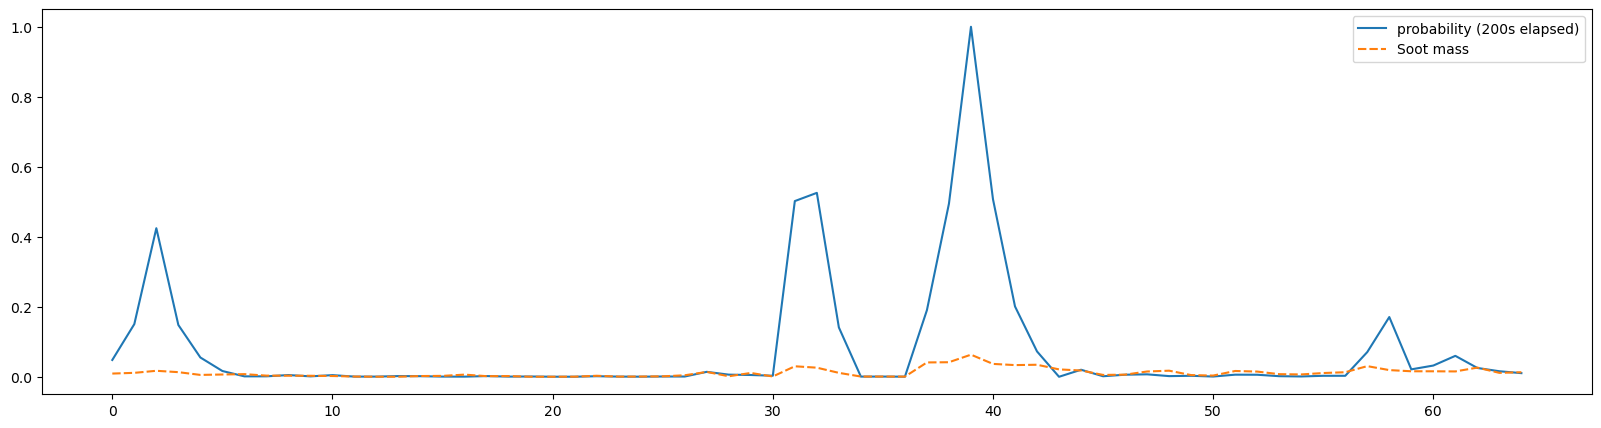

In [8]:
df_2nd_multiply = df_2nd.copy()
df_2nd_multiply['Soot mass'] = df_2nd_multiply['Soot mass']*10
plt.figure(figsize=(20,5))
lineplot_1= sns.lineplot(data=df_2nd_multiply[['probability (200s elapsed)', 'Soot mass']])

<Axes: >

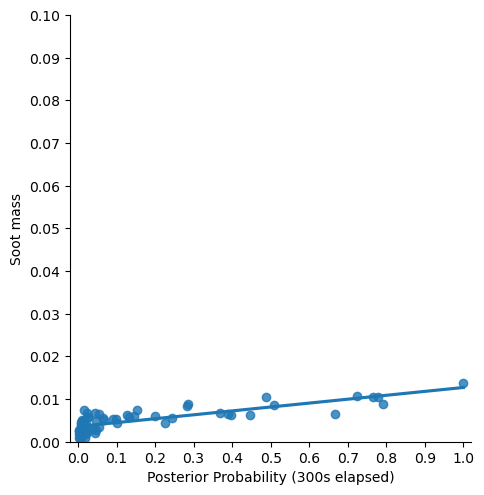

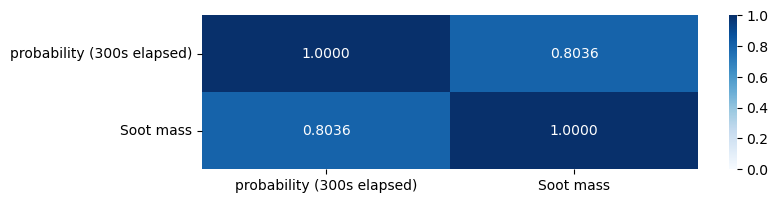

In [9]:
# 300s elapsed
sd_df_3rd = sd_df[['Node', '300s']]
sd_df_3rd = sd_df_3rd.rename(columns = {'300s':'Soot mass'})

df_3rd=pd.merge(third_slice, sd_df_3rd)
#set_1 = set(df_3rd[(df_3rd['probability (300s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_3rd[(df_3rd['Soot mass'] == 0)].index.tolist())
#df_3rd_index = list((set_1 | set_2))
#df_3rd.drop(df_3rd_index, inplace=True)

g3= sns.lmplot(data=df_3rd, x='probability (300s elapsed)', y='Soot mass', ci=None)
g3=(g3.set_axis_labels("Posterior Probability (300s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], yticks = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
plt.figure(figsize=(8,2))
df_3rd_corr=df_3rd[['probability (300s elapsed)', 'Soot mass']].corr(method='spearman')
sns.heatmap(df_3rd_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

<Axes: >

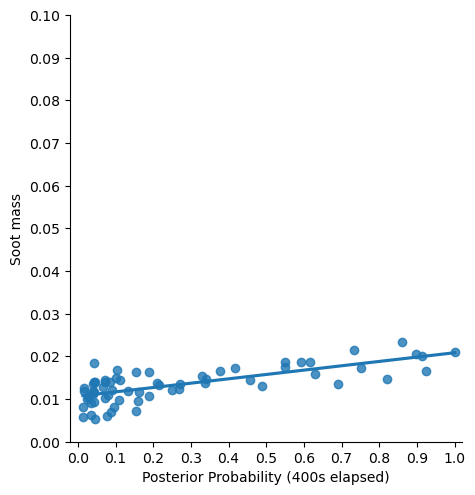

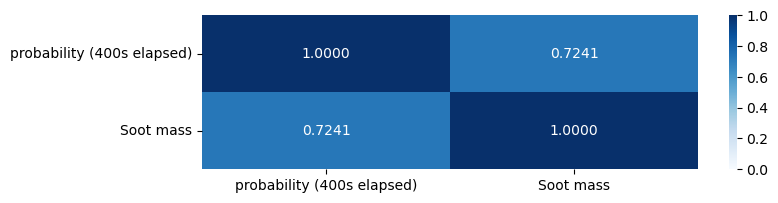

In [10]:
# 400s elapsed
sd_df_4th = sd_df[['Node', '400s']]
sd_df_4th = sd_df_4th.rename(columns = {'400s':'Soot mass'})

df_4th=pd.merge(fourth_slice, sd_df_4th)
#set_1 = set(df_4th[(df_4th['probability (400s elapsed)'] == 0)].index.tolist())
#set_2 = set(df_4th[(df_4th['Soot mass'] == 0)].index.tolist())
#df_4th_index = list((set_1 | set_2))
#df_4th.drop(df_4th_index, inplace=True)

g4= sns.lmplot(data=df_4th, x='probability (400s elapsed)', y='Soot mass', ci=None)
g4=(g4.set_axis_labels("Posterior Probability (400s elapsed)", 'Soot mass')).set(xlim=(-0.02, 1.02), xticks=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], yticks = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
plt.figure(figsize=(8,2))
df_4th_corr=df_4th[['probability (400s elapsed)', 'Soot mass']].corr(method='pearson')
sns.heatmap(df_4th_corr, cmap='Blues', annot=True, fmt='.4f', vmin=0, vmax=1)

#### pearson & p-value 검정

In [11]:
p_df_1st = df_1st.dropna()
p_df_1st['probability (100s elapsed)'].values
p_df_1st['Soot mass'].values

p_df_2nd = df_2nd.dropna()
p_df_2nd['probability (200s elapsed)'].values
p_df_2nd['Soot mass'].values

p_df_3rd = df_3rd.dropna()
p_df_3rd['probability (300s elapsed)'].values
p_df_3rd['Soot mass'].values

p_df_4th = df_4th.dropna()
p_df_4th['probability (400s elapsed)'].values
p_df_4th['Soot mass'].values

print(stats.pearsonr(p_df_1st['probability (100s elapsed)'].values, p_df_1st['Soot mass'].values))
print(stats.pearsonr(p_df_2nd['probability (200s elapsed)'].values, p_df_2nd['Soot mass'].values))
print(stats.pearsonr(p_df_3rd['probability (300s elapsed)'].values, p_df_3rd['Soot mass'].values))
print(stats.pearsonr(p_df_4th['probability (400s elapsed)'].values, p_df_4th['Soot mass'].values))

PearsonRResult(statistic=0.786645912700619, pvalue=8.065558562443614e-15)
PearsonRResult(statistic=0.7759416599707236, pvalue=3.160706049075406e-14)
PearsonRResult(statistic=0.8095602858753821, pvalue=3.27162353600327e-16)
PearsonRResult(statistic=0.724058185696532, pvalue=9.376463196774973e-12)


#### spearman & pvalue 상관계수

In [12]:
print(stats.spearmanr(p_df_1st['probability (100s elapsed)'].values, p_df_1st['Soot mass'].values))
print(stats.spearmanr(p_df_2nd['probability (200s elapsed)'].values, p_df_2nd['Soot mass'].values))
print(stats.spearmanr(p_df_3rd['probability (300s elapsed)'].values, p_df_3rd['Soot mass'].values))
print(stats.spearmanr(p_df_4th['probability (400s elapsed)'].values, p_df_4th['Soot mass'].values))

SignificanceResult(statistic=0.9046542188091464, pvalue=5.067554610862823e-25)
SignificanceResult(statistic=0.7803311216893354, pvalue=1.822038643406075e-14)
SignificanceResult(statistic=0.803592696646492, pvalue=7.847734306572563e-16)
SignificanceResult(statistic=0.6940559440559441, pvalue=1.449365608967499e-10)


In [13]:
!pip install statannot

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statannot import add_stat_annotation
%matplotlib inline

In [15]:
import math
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_squared_error

pred1_value = p_df_1st['probability (100s elapsed)'].values
true1_value = p_df_1st['Soot mass'].values
rmse1 = math.sqrt(mean_squared_error(true1_value,pred1_value))
print('rmse1:', rmse1)

pred2_value = p_df_2nd['probability (200s elapsed)'].values
true2_value = p_df_2nd['Soot mass'].values
rmse2 = math.sqrt(mean_squared_error(true2_value,pred2_value))
print('rmse2:', rmse2)

pred3_value = p_df_3rd['probability (300s elapsed)'].values
true3_value = p_df_3rd['Soot mass'].values
rmse3 = math.sqrt(mean_squared_error(true3_value,pred3_value))
print('rmse3:', rmse3)

pred4_value = p_df_4th['probability (400s elapsed)'].values
true4_value = p_df_4th['Soot mass'].values
rmse4 = math.sqrt(mean_squared_error(true4_value,pred4_value))
print('rmse4:', rmse4)

rmse1: 0.1325381716950459
rmse2: 0.19092753806089136
rmse3: 0.2829477309051974
rmse4: 0.37973550977691933


In [16]:
import numpy as np

def fft_calculation(predict, observe):
    # 예측값과 관측값의 FFT 계산
    predicted_fft = np.fft.fft(predict)
    observed_fft = np.fft.fft(observe)

    # 상관관계 계산
    correlation = np.corrcoef(np.abs(predicted_fft), np.abs(observed_fft))[0, 1]
    
    print(f"FFT 그래프 간의 상관관계: {correlation}")
    
fft_calculation(pred1_value,true1_value)
fft_calculation(pred2_value,true2_value)
fft_calculation(pred3_value,true3_value)
fft_calculation(pred4_value,true4_value)

FFT 그래프 간의 상관관계: 0.5536494553728943
FFT 그래프 간의 상관관계: 0.7552149481461339
FFT 그래프 간의 상관관계: 0.7798707348659054
FFT 그래프 간의 상관관계: 0.8383841107244285


In [17]:
import math
import numpy as np
p_df_1st = df_1st.dropna()
p_df_2nd = df_2nd.dropna()
p_df_3rd = df_3rd.dropna()
p_df_4th = df_4th.dropna()
def Z_normalized(rawdata, adjust=False):
    m = np.mean(rawdata) # 평균, numpy필요
    s = (math.sqrt(np.mean(rawdata-m)**2)) # 표준편차, math 필요
    
    Z = (rawdata - m) / s # Z정규화
    
    if adjust == True:
        Z = (Z-min(Z)) / (max(Z) - min(Z))
    
    return Z

def pearsonr(dataset1, dataset2): #dataset 2에 정규화한쪽 넣기
    pear = stats.pearsonr(dataset1, dataset2) 
    return pear

def spearmanr(dataset1, dataset2): #dataset 2에 정규화한쪽 넣기
    spear = stats.spearmanr(dataset1, dataset2)
    return spear

In [18]:
#### spearman & pvalue 상관계수

Z_1=Z_normalized(p_df_1st['Soot mass'].values, True)
Z_2=Z_normalized(p_df_2nd['Soot mass'].values, True)
Z_3=Z_normalized(p_df_3rd['Soot mass'].values, True)
Z_4=Z_normalized(p_df_4th['Soot mass'].values, True)

print('.............PEARSON COEFFICIENT..............')
print('1:', pearsonr(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('2:', pearsonr(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('3:', pearsonr(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('4:', pearsonr(p_df_4th['probability (400s elapsed)'].values,Z_4))
print('.............SPEARMAN COEFFICIENT..............')
print('1:', spearmanr(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('2:', spearmanr(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('3:', spearmanr(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('4:', spearmanr(p_df_4th['probability (400s elapsed)'].values,Z_4))

.............PEARSON COEFFICIENT..............
1: PearsonRResult(statistic=0.786645912700619, pvalue=8.065558562443614e-15)
2: PearsonRResult(statistic=0.7759416599707236, pvalue=3.160706049075406e-14)
3: PearsonRResult(statistic=0.8095602858753821, pvalue=3.27162353600327e-16)
4: PearsonRResult(statistic=0.7240581856965318, pvalue=9.376463196775218e-12)
.............SPEARMAN COEFFICIENT..............
1: SignificanceResult(statistic=0.9072670260372584, pvalue=2.199004670783509e-25)
2: SignificanceResult(statistic=0.7803311216893354, pvalue=1.822038643406075e-14)
3: SignificanceResult(statistic=0.803592696646492, pvalue=7.847734306572563e-16)
4: SignificanceResult(statistic=0.6940559440559441, pvalue=1.449365608967499e-10)


In [19]:
Z_P_1 = Z_normalized(p_df_1st['probability (100s elapsed)'].values, True)
Z_P_2 = Z_normalized(p_df_2nd['probability (200s elapsed)'].values, True)
Z_P_3 = Z_normalized(p_df_3rd['probability (300s elapsed)'].values, True)
Z_P_4 = Z_normalized(p_df_4th['probability (400s elapsed)'].values, True)

print('.............PEARSON COEFFICIENT..............')
print('1:', pearsonr(Z_P_1,Z_1))
print('2:', pearsonr(Z_P_2,Z_2))
print('3:', pearsonr(Z_P_3,Z_3))
print('4:', pearsonr(Z_P_4,Z_4))
print('.............SPEARMAN COEFFICIENT..............')
print('1:', spearmanr(Z_P_1,Z_1))
print('2:', spearmanr(Z_P_2,Z_2))
print('3:', spearmanr(Z_P_3,Z_3))
print('4:', spearmanr(Z_P_4,Z_4))

.............PEARSON COEFFICIENT..............
1: PearsonRResult(statistic=0.786645912700619, pvalue=8.065558562443614e-15)
2: PearsonRResult(statistic=0.7759416599707236, pvalue=3.160706049075406e-14)
3: PearsonRResult(statistic=0.809560285875382, pvalue=3.2716235360033553e-16)
4: PearsonRResult(statistic=0.7240581856965318, pvalue=9.376463196775218e-12)
.............SPEARMAN COEFFICIENT..............
1: SignificanceResult(statistic=0.9072670260372584, pvalue=2.199004670783509e-25)
2: SignificanceResult(statistic=0.7803311216893354, pvalue=1.822038643406075e-14)
3: SignificanceResult(statistic=0.803592696646492, pvalue=7.847734306572563e-16)
4: SignificanceResult(statistic=0.6940559440559441, pvalue=1.449365608967499e-10)


FFT 그래프 간의 상관관계: 0.5536494553728941


C:\Users\lablj\AppData\Local\Temp\ipykernel_6716\3580565654.py:24: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 30, 10)


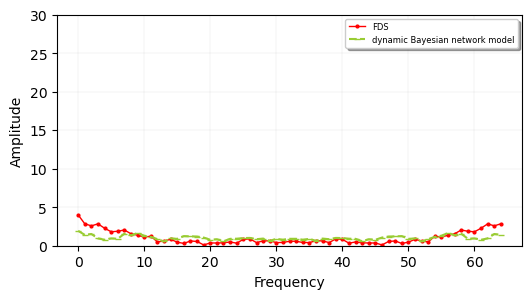

FFT 그래프 간의 상관관계: 0.7560176690335254


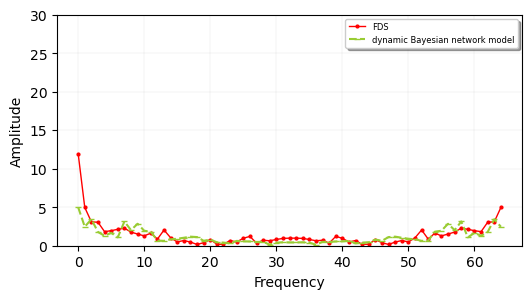

FFT 그래프 간의 상관관계: 0.7963321131734316


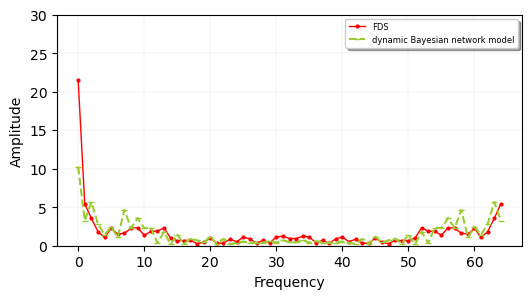

FFT 그래프 간의 상관관계: 0.8635206706087459


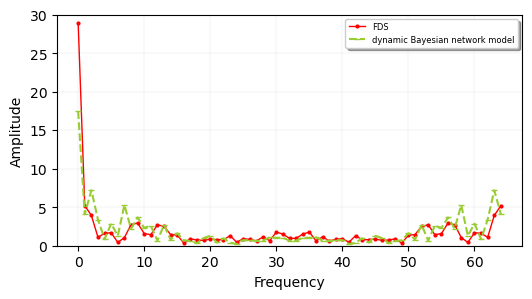

In [20]:
### 기타

import numpy as np

def fft_calculation(predict, observe, plot=True):
    # 예측값과 관측값의 FFT 계산
    predicted_fft = np.fft.fft(predict)
    observed_fft = np.fft.fft(observe)

    # 상관관계 계산
    correlation = np.corrcoef(np.abs(predicted_fft), np.abs(observed_fft))[0, 1]
    
    print(f"FFT 그래프 간의 상관관계: {correlation}")
    
    if plot == True:
        plt.figure(figsize=(6,3))
        plt.plot(np.abs(observed_fft), label='FDS', color = '#ff0000', marker='o', markersize=2, linewidth=1)
        plt.plot(np.abs(predicted_fft), label='dynamic Bayesian network model', color='#99CC33', linestyle='--', marker='_', markersize=5, linewidth=1.5)
        plt.legend(shadow=True, prop={'size':6})
        plt.grid(True, lw=0.1)
        #plt.title('FFT result comparison')
        plt.xlabel('Frequency')
        plt.ylabel('Amplitude')
        plt.ylim(0, 30, 10)
        plt.show()

        
fft_calculation(p_df_1st['probability (100s elapsed)'].values,Z_1)
fft_calculation(p_df_2nd['probability (200s elapsed)'].values,Z_2)
fft_calculation(p_df_3rd['probability (300s elapsed)'].values,Z_3)
fft_calculation(p_df_4th['probability (400s elapsed)'].values,Z_4)

In [21]:
def mean_absolute_error(y_true, y_pred):
    """
    평균 절대 오차(MAE)를 계산하는 함수
    :param y_true: 실제 값이 담긴 배열
    :param y_pred: 예측 값이 담긴 배열
    :return: MAE 값
    """
    n = len(y_true)
    if n != len(y_pred):
        raise ValueError("실제 값과 예측 값의 길이가 동일해야 합니다.")
    absolute_errors = [abs(y_true[i] - y_pred[i]) for i in range(n)]
    mae = sum(absolute_errors) / n
    return mae

print(mean_absolute_error(p_df_1st['probability (100s elapsed)'].values,Z_1))
print(mean_absolute_error(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print(mean_absolute_error(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print(mean_absolute_error(p_df_4th['probability (400s elapsed)'].values,Z_4))

0.043260052302181766
0.11626347988460611
0.18646319328876684
0.22207114646565873


In [22]:
print(p_df_1st['probability (100s elapsed)'].values)
print(Z_1)

[3.800e-03 2.590e-02 1.477e-01 1.400e-02 4.500e-03 1.200e-03 0.000e+00
 0.000e+00 4.000e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 8.000e-04
 0.000e+00 3.000e-04 0.000e+00 2.378e-01 2.134e-01 2.250e-02 0.000e+00
 0.000e+00 0.000e+00 1.510e-02 9.500e-02 1.000e+00 9.790e-02 1.650e-02
 4.100e-03 3.000e-04 1.000e-03 0.000e+00 2.000e-04 4.000e-04 1.000e-04
 0.000e+00 0.000e+00 5.000e-04 6.000e-04 0.000e+00 0.000e+00 0.000e+00
 1.000e-04 4.100e-03 1.490e-02 1.300e-03 2.700e-03 3.200e-03 1.300e-03
 1.000e-03 3.000e-04]
[1.19734285e-02 5.19245486e-03 7.42307215e-02 4.98401785e-02
 6.19289958e-03 4.46938391e-03 0.00000000e+00 1.56588980e-04
 5.49642415e-04 4.00673903e-04 6.62213782e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 4.79627871e-05 0.00000000e+00
 0.00000000e+00 8.15221703e-04 4.20191433e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.0

In [23]:
# 유클리드 유사도 
def euclidean_distance(model, real):
    euclidean_distance = np.linalg.norm(model - real)
    return euclidean_distance

print('............EUCLIDEAN.............')
print(euclidean_distance(p_df_1st['probability (100s elapsed)'].values,Z_1))
print(euclidean_distance(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print(euclidean_distance(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print(euclidean_distance(p_df_4th['probability (400s elapsed)'].values,Z_4))

# 코사인 유사도
from scipy.spatial.distance import cosine
def cosine_simularity(model, real):
    cosine_simularity = 1-cosine(model, real)
    return cosine_simularity

print('............COSINE.............')
print(cosine_simularity(p_df_1st['probability (100s elapsed)'].values,Z_1))
print(cosine_simularity(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print(cosine_simularity(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print(cosine_simularity(p_df_4th['probability (400s elapsed)'].values,Z_4))

............EUCLIDEAN.............
0.8248976813266773
1.3454269618716677
1.7998390777726463
2.130457298448516
............COSINE.............
0.7955540118489807
0.7942853140342202
0.8263951949736421
0.8498396684705414


In [24]:

### CV-RMSE

def cv_rmse(prediction, observation):
    pred = prediction
    obse = observation
    
    squared_residual = sum((pred-obse)**2)
    rmse = math.sqrt(squared_residual/len(pred))
    
    m_pred = np.mean(pred)
    m_obse = np.mean(obse)
    cv_rmse = rmse/m_obse
    
    return rmse, m_obse, cv_rmse

print('cv_rmse1:', cv_rmse(p_df_1st['probability (100s elapsed)'].values,Z_1))
print('cv_rmse2:', cv_rmse(p_df_2nd['probability (200s elapsed)'].values,Z_2))
print('cv_rmse3:', cv_rmse(p_df_3rd['probability (300s elapsed)'].values,Z_3))
print('cv_rmse4:', cv_rmse(p_df_4th['probability (400s elapsed)'].values,Z_4))


cv_rmse1: (0.10231596496660789, 0.06159713085808382, 1.6610508239797381)
cv_rmse2: (0.16687967612491733, 0.18396101944271814, 0.9071469414034227)
cv_rmse3: (0.2232425623148159, 0.33037188833661374, 0.6757311084754146)
cv_rmse4: (0.2642507055667037, 0.44511155648660833, 0.5936729831337326)


In [31]:
list(Z_1)

[0.011973428529073557,
 0.005192454856144647,
 0.07423072146030905,
 0.04984017853207847,
 0.006192899583718956,
 0.004469383912080166,
 0.0,
 0.00015658897957057368,
 0.0005496424149909207,
 0.0004006739025044956,
 0.0006622137817469336,
 0.0,
 0.0,
 0.0,
 4.796278711972356e-05,
 0.0,
 0.0,
 0.0008152217027056259,
 0.0004201914331846875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.023989887455877816,
 0.0,
 0.011204089891061773,
 0.0,
 0.0865648200455946,
 0.08963464227476152,
 0.021182414430007488,
 0.0,
 0.0,
 0.0,
 0.3557147493299037,
 0.4794002988889823,
 1.0,
 0.47585610058054967,
 0.31661077522827347,
 0.2391913169946031,
 0.02642675416982182,
 0.07473009844104954,
 0.0,
 0.0010256780092230845,
 0.0509237111915093,
 0.008337319855283243,
 1.5975896566778222e-05,
 0.0,
 0.0063463826820678625,
 0.0008480834645479988,
 0.0,
 0.0,
 8.814420391705901e-07,
 0.00019071200483990823,
 0.21198280386712662,
 0.09775993525407566,
 0.03429610843339703,
 0.02275723082963728,
 0.0569240